<a href="https://colab.research.google.com/github/KC-Night/linear_models_assignment/blob/main/assignment_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

In [1]:
! git clone https://github.com/KC-Night/linear_models_assignment.git

Cloning into 'linear_models_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 18.05 KiB | 4.51 MiB/s, done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

In [3]:
# Check repo

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

Q2:1

In [4]:
cars_df=pd.read_csv("./linear_models_assignment/data/cars_hw.csv")
cars_df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [5]:
cars_df.dtypes

,0
Unnamed: 0,int64
Make,object
Make_Year,int64
Color,object
Body_Type,object
Mileage_Run,int64
No_of_Owners,object
Seating_Capacity,int64
Fuel_Type,object
Transmission,object


In [6]:
cars_df['No_of_Owners']= cars_df["No_of_Owners"].str.replace(r"\D+", "", regex=True).astype(int)

display(cars_df.dtypes)

,0
Unnamed: 0,int64
Make,object
Make_Year,int64
Color,object
Body_Type,object
Mileage_Run,int64
No_of_Owners,int64
Seating_Capacity,int64
Fuel_Type,object
Transmission,object


In [7]:
cars_df['Mileage_Run'] = np.log(cars_df['Mileage_Run'])
print(cars_df['Mileage_Run'])

0      10.705736
1       9.918622
2      10.293501
3      10.482346
4      10.131658
         ...    
971    10.080336
972     9.604475
973    10.875137
974    10.251853
975    10.625611
Name: Mileage_Run, Length: 976, dtype: float64


In [8]:
cars_df['Price']= np.log(cars_df['Price'])
print(cars_df['Price'])

0      13.395439
1      13.432785
2      13.583579
3      12.933621
4      13.151922
         ...    
971    13.770513
972    13.842152
973    13.508985
974    13.526494
975    13.445895
Name: Price, Length: 976, dtype: float64


In [9]:
cars_df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,10.705736,1,5,diesel,7-Speed,Automatic,13.395439
1,2,Hyundai,2016,red,crossover,9.918622,1,5,petrol,5-Speed,Manual,13.432785
2,3,Honda,2019,white,suv,10.293501,2,5,petrol,5-Speed,Manual,13.583579
3,4,Renault,2017,bronze,hatchback,10.482346,1,5,petrol,5-Speed,Manual,12.933621
4,5,Hyundai,2017,orange,hatchback,10.131658,1,5,petrol,5-Speed,Manual,13.151922


In [10]:
cars_df.tail()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
971,972,Hyundai,2018,white,sedan,10.080336,1,5,petrol,6-Speed,Automatic,13.770513
972,973,Hyundai,2019,white,sedan,9.604475,1,5,petrol,6-Speed,Automatic,13.842152
973,974,Hyundai,2014,silver,sedan,10.875137,1,5,petrol,4-Speed,Automatic,13.508985
974,975,Ford,2020,white,crossover,10.251853,2,5,diesel,5-Speed,Automatic,13.526494
975,976,Maruti Suzuki,2018,silver,hatchback,10.625611,1,5,petrol,5-Speed,Automatic,13.445895


Q2:2

In [11]:
cars_df['Price'].describe()

,Price
count,976.000000
mean,13.411033
std,0.450276
min,12.144197
25%,13.072647
50%,13.409795
75%,13.691080
max,14.894260


<Axes: xlabel='Price', ylabel='Density'>

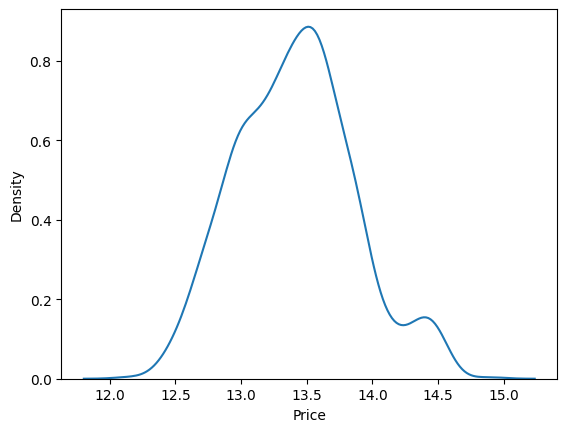

In [12]:
sns.kdeplot(cars_df['Price'])

In [13]:
cars_df.groupby('Make')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,12.919895,0.480975,12.495004,12.568392,12.752286,13.171681,13.701221
Datsun,3.0,12.576047,0.036311,12.538967,12.558302,12.577636,12.594587,12.611538
Ford,52.0,13.468280,0.210895,12.577636,13.361380,13.469493,13.575984,13.879424
Honda,73.0,13.536318,0.336972,12.663497,13.272506,13.573439,13.726679,14.245343
Hyundai,305.0,13.368511,0.398781,12.421184,13.091904,13.366094,13.637579,14.370544
Jeep,4.0,14.216591,0.105084,14.070153,14.183270,14.240265,14.273586,14.315680
Kia,8.0,14.292177,0.076877,14.129591,14.272242,14.303105,14.349515,14.369970
MG Motors,35.0,14.439052,0.066263,14.278615,14.395744,14.429615,14.497597,14.518113
Mahindra,18.0,13.898953,0.159906,13.587354,13.851808,13.905680,13.961249,14.197366


<Axes: xlabel='Price', ylabel='Density'>

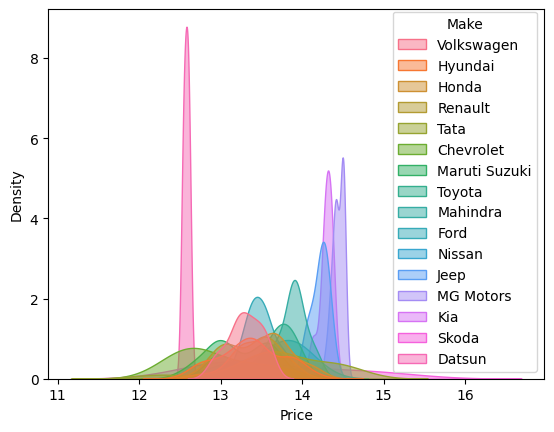

In [14]:
sns.kdeplot(data=cars_df, x="Price", hue="Make", fill=True, common_norm=False, alpha=0.5)

In [15]:
# The car brands that appear to be the most expensive are MG Motors, Kia, and Jeep
# There seems to be a wide range of prices for these cars, and the average prices for most brands tend to range from log(12) to log (15) (160,000- 3.27M) price range

Q2:3

In [16]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(cars_df, test_size=0.2, random_state=42)

Q2:4

In [17]:
# Make a model where you regress price on the numeric variables alone
from sklearn.linear_model import LinearRegression

y_train = train_df['Price']
y_test = test_df['Price']
numeric_vars = ['Mileage_Run', 'Make_Year', 'No_of_Owners','Seating_Capacity']
x_train = train_df[numeric_vars]
x_test = test_df[numeric_vars]

display(x_train.head())

,Mileage_Run,Make_Year,No_of_Owners,Seating_Capacity
679,9.798405,2018,1,5
625,10.771470,2013,2,5
33,9.502189,2021,1,5
31,9.273409,2013,1,5
883,10.497035,2017,1,5


In [18]:
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train)) # R squared train
residuals=y_train-reg.predict(x_train)
print(np.sqrt(np.mean(residuals**2))) # RMSE train

0.4271566824728036
0.34283845063780494


In [19]:
reg2 = LinearRegression().fit(x_test, y_test)
print(reg2.score(x_test, y_test)) # R squared test
residuals2=y_test-reg2.predict(x_test)
print(np.sqrt(np.mean(residuals2**2))) # RMSE test

0.40507638563339143
0.33682928815829666


In [20]:
# Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone
# (you can use pd.get_dummies(); be careful of the dummy variable trap)

y_train_cat= train_df['Price']
y_test_cat = test_df['Price']
categorical_vars = ['Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
x_train_cat = pd.get_dummies(train_df[categorical_vars], drop_first=True)
x_test_cat = pd.get_dummies(test_df[categorical_vars], drop_first=True)

display(x_train_cat.head())

,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
679,False,False,False,True,False,False,False,True,False,False,True
625,True,False,False,False,True,False,True,False,False,False,True
33,True,False,False,False,True,False,False,False,True,False,False
31,False,False,True,False,True,False,True,False,False,False,True
883,False,False,True,False,True,False,False,False,False,False,True


In [21]:
reg2 = LinearRegression().fit(x_test_cat, y_test_cat)
print(reg2.score(x_test_cat, y_test_cat)) # R squared test
residuals2=y_test-reg2.predict(x_test_cat)
print(np.sqrt(np.mean(residuals2**2))) # RMSE test

0.5574906203219265
0.2904962188647116


In [22]:
# The second model performs better due to higher R^2 for more variability, and lower RSME for predictions that are closer to the actual values

In [23]:
# Make a third model that combines all the regressors from the previous two

x_train_joint = pd.concat([x_train, x_train_cat], axis=1)
x_test_joint = pd.concat([x_test, x_test_cat], axis=1)
x_train_joint, x_test_joint = x_train_joint.align(x_test_joint, join='left', axis=1, fill_value=0)
display(x_train_joint.head())


,Mileage_Run,Make_Year,No_of_Owners,Seating_Capacity,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
679,9.798405,2018,1,5,False,False,False,True,False,False,False,True,False,False,True
625,10.771470,2013,2,5,True,False,False,False,True,False,True,False,False,False,True
33,9.502189,2021,1,5,True,False,False,False,True,False,False,False,True,False,False
31,9.273409,2013,1,5,False,False,True,False,True,False,True,False,False,False,True
883,10.497035,2017,1,5,False,False,True,False,True,False,False,False,False,False,True


In [24]:
reg.fit(x_test_joint, y_test)
print(reg.score(x_test_joint, y_test)) # R squared test
residuals=y_test-reg.predict(x_test_joint)
print(np.sqrt(np.mean(residuals**2))) # RMSE test

0.7633910876402246
0.21241970099603485


In [25]:
# The joint test performs better than the previous two models by around 0.21 for the R squared test, and around 0.08 for the RSME test

Q2:5

In [26]:
from sklearn.preprocessing import PolynomialFeatures

expander= PolynomialFeatures(degree=3)
x_train_poly = expander.fit_transform(x_train_joint)
x_test_poly = expander.fit_transform(x_test_joint)

names = expander.get_feature_names_out()
poly_df= pd.DataFrame(data=x_train_poly, columns = names)

poly_df.head()

,1,Mileage_Run,Make_Year,No_of_Owners,Seating_Capacity,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_petrol,...,Transmission_7-Speed^3,Transmission_7-Speed^2 Transmission_CVT,Transmission_7-Speed^2 Transmission_Type_Manual,Transmission_7-Speed Transmission_CVT^2,Transmission_7-Speed Transmission_CVT Transmission_Type_Manual,Transmission_7-Speed Transmission_Type_Manual^2,Transmission_CVT^3,Transmission_CVT^2 Transmission_Type_Manual,Transmission_CVT Transmission_Type_Manual^2,Transmission_Type_Manual^3
0,1.0,9.798405,2018.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,10.771470,2013.0,2.0,5.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,9.502189,2021.0,1.0,5.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,9.273409,2013.0,1.0,5.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,10.497035,2017.0,1.0,5.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
reg3= LinearRegression().fit(x_train_poly, y_train)
print(reg3.score(x_train_poly, y_train)) # R squared train
residuals3=y_train-reg3.predict(x_train_poly)
print(np.sqrt(np.mean(residuals3**2))) # RMSE train

0.8508750210054585
0.17492295120095244


In [28]:
reg4= LinearRegression().fit(x_test_poly, y_test)
print(reg4.score(x_test_poly, y_test)) # R squared test
residuals4=y_test-reg4.predict(x_test_poly)
print(np.sqrt(np.mean(residuals4**2))) # RMSE test

0.8818301843917302
0.150117914546576


In [29]:
# As you increase degrees, R^2 decreases, while RMSE increases. R^2 seems to go negative sometime after 8 degrees (google colab keeps crashing if I attempt anything over 8 degrees)
# Best R^2= 0.88, best RSME= 0.15, R^2 is better by around 0.12, RSME is better by around 0.6

Q2:6

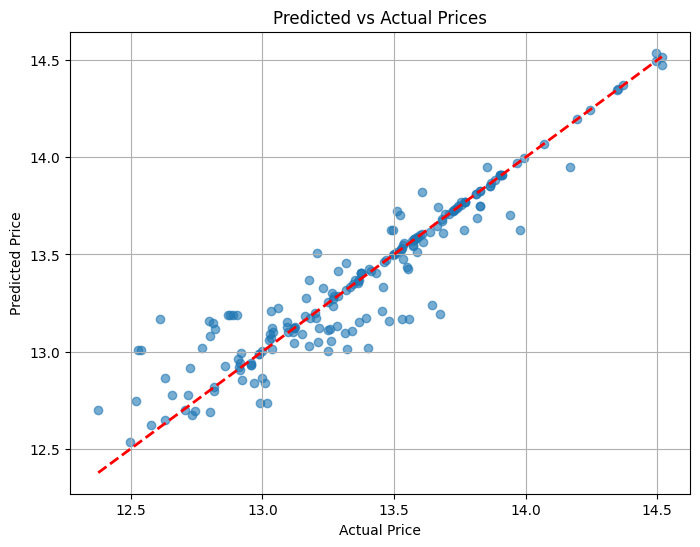

In [30]:
y_pred_best = reg4.predict(x_test_poly)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title("Predicted vs Actual Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

# The predicted and true values seem to roughly line up along the diagonal

<Axes: xlabel='Price', ylabel='Density'>

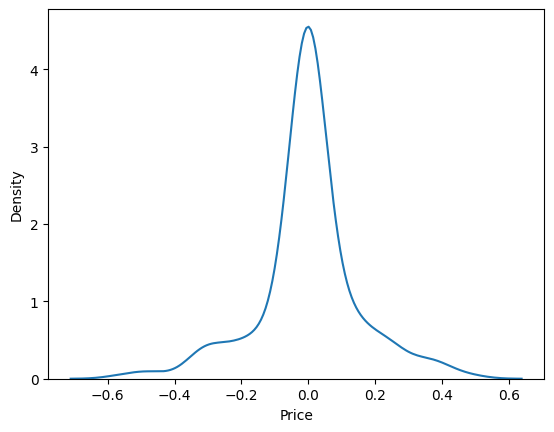

In [31]:
residuals4=y_test-y_pred_best
sns.kdeplot(residuals4)

# Yes, residuals do look roughly bell shaped around zero.
# Strengths: residuals are centered around 0 (doesn't overpredict/underpredict), density is larger around 0 (low variance)
# Weaknesses: heavier tails (some data points may have larger error), slight left skewness (maybe overpredicts slightly)

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?